<a href="https://colab.research.google.com/github/JoeConrad11/CollegeData12/blob/main/DTSC1302.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
url = "https://raw.githubusercontent.com/JoeConrad11/CollegeData12/refs/heads/main/College_Data%20(1).csv"
df = pd.read_csv(url)
df.head(7)

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   
5             Albertson College     Yes   587     479     158         38   
6       Albertus Magnus College     Yes   353     340     103         17   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   
5         62          678           41     13500        3335    500       675   
6         45          416          230     13290        5720    500      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15  
5   67        73        9.4           11    9727         55  
6   90        93       11.5           26    8861         63

In [3]:

!git clone https://github.com/JoeConrad11/CollegeData12
# Change directory to the cloned repository
%cd CollegeData12
# Updated path to include subdirectory
df = pd.read_csv("College_Data (1).csv") # Fixed the filename here, removing incorrect '12'
df.head(5)

Cloning into 'CollegeData12'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 7.24 MiB | 9.48 MiB/s, done.
Resolving deltas: 100% (3/3), done.
/content/CollegeData12


Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

#Correlation Heatmap for all the data

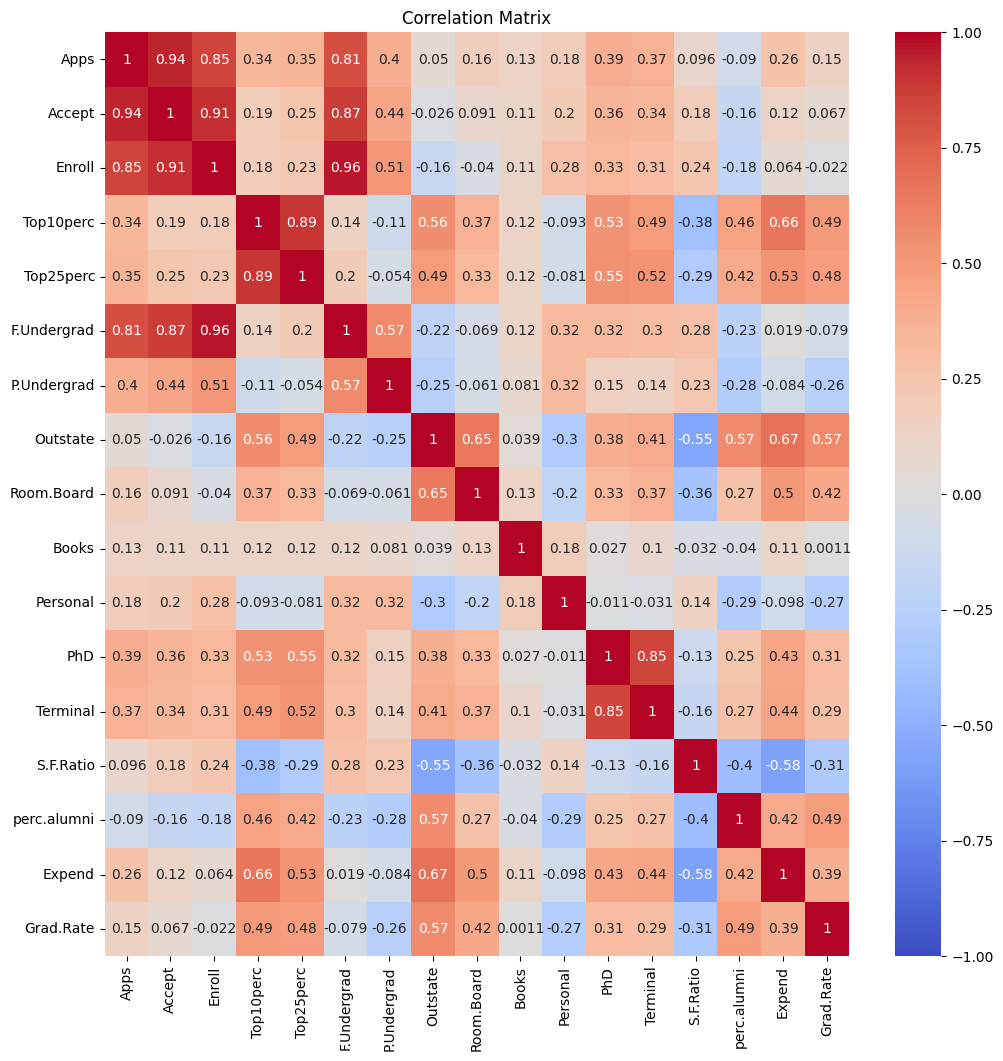

In [4]:

numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns

plt.figure(figsize=(12, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

#Scatterplot Heatmap for all the data

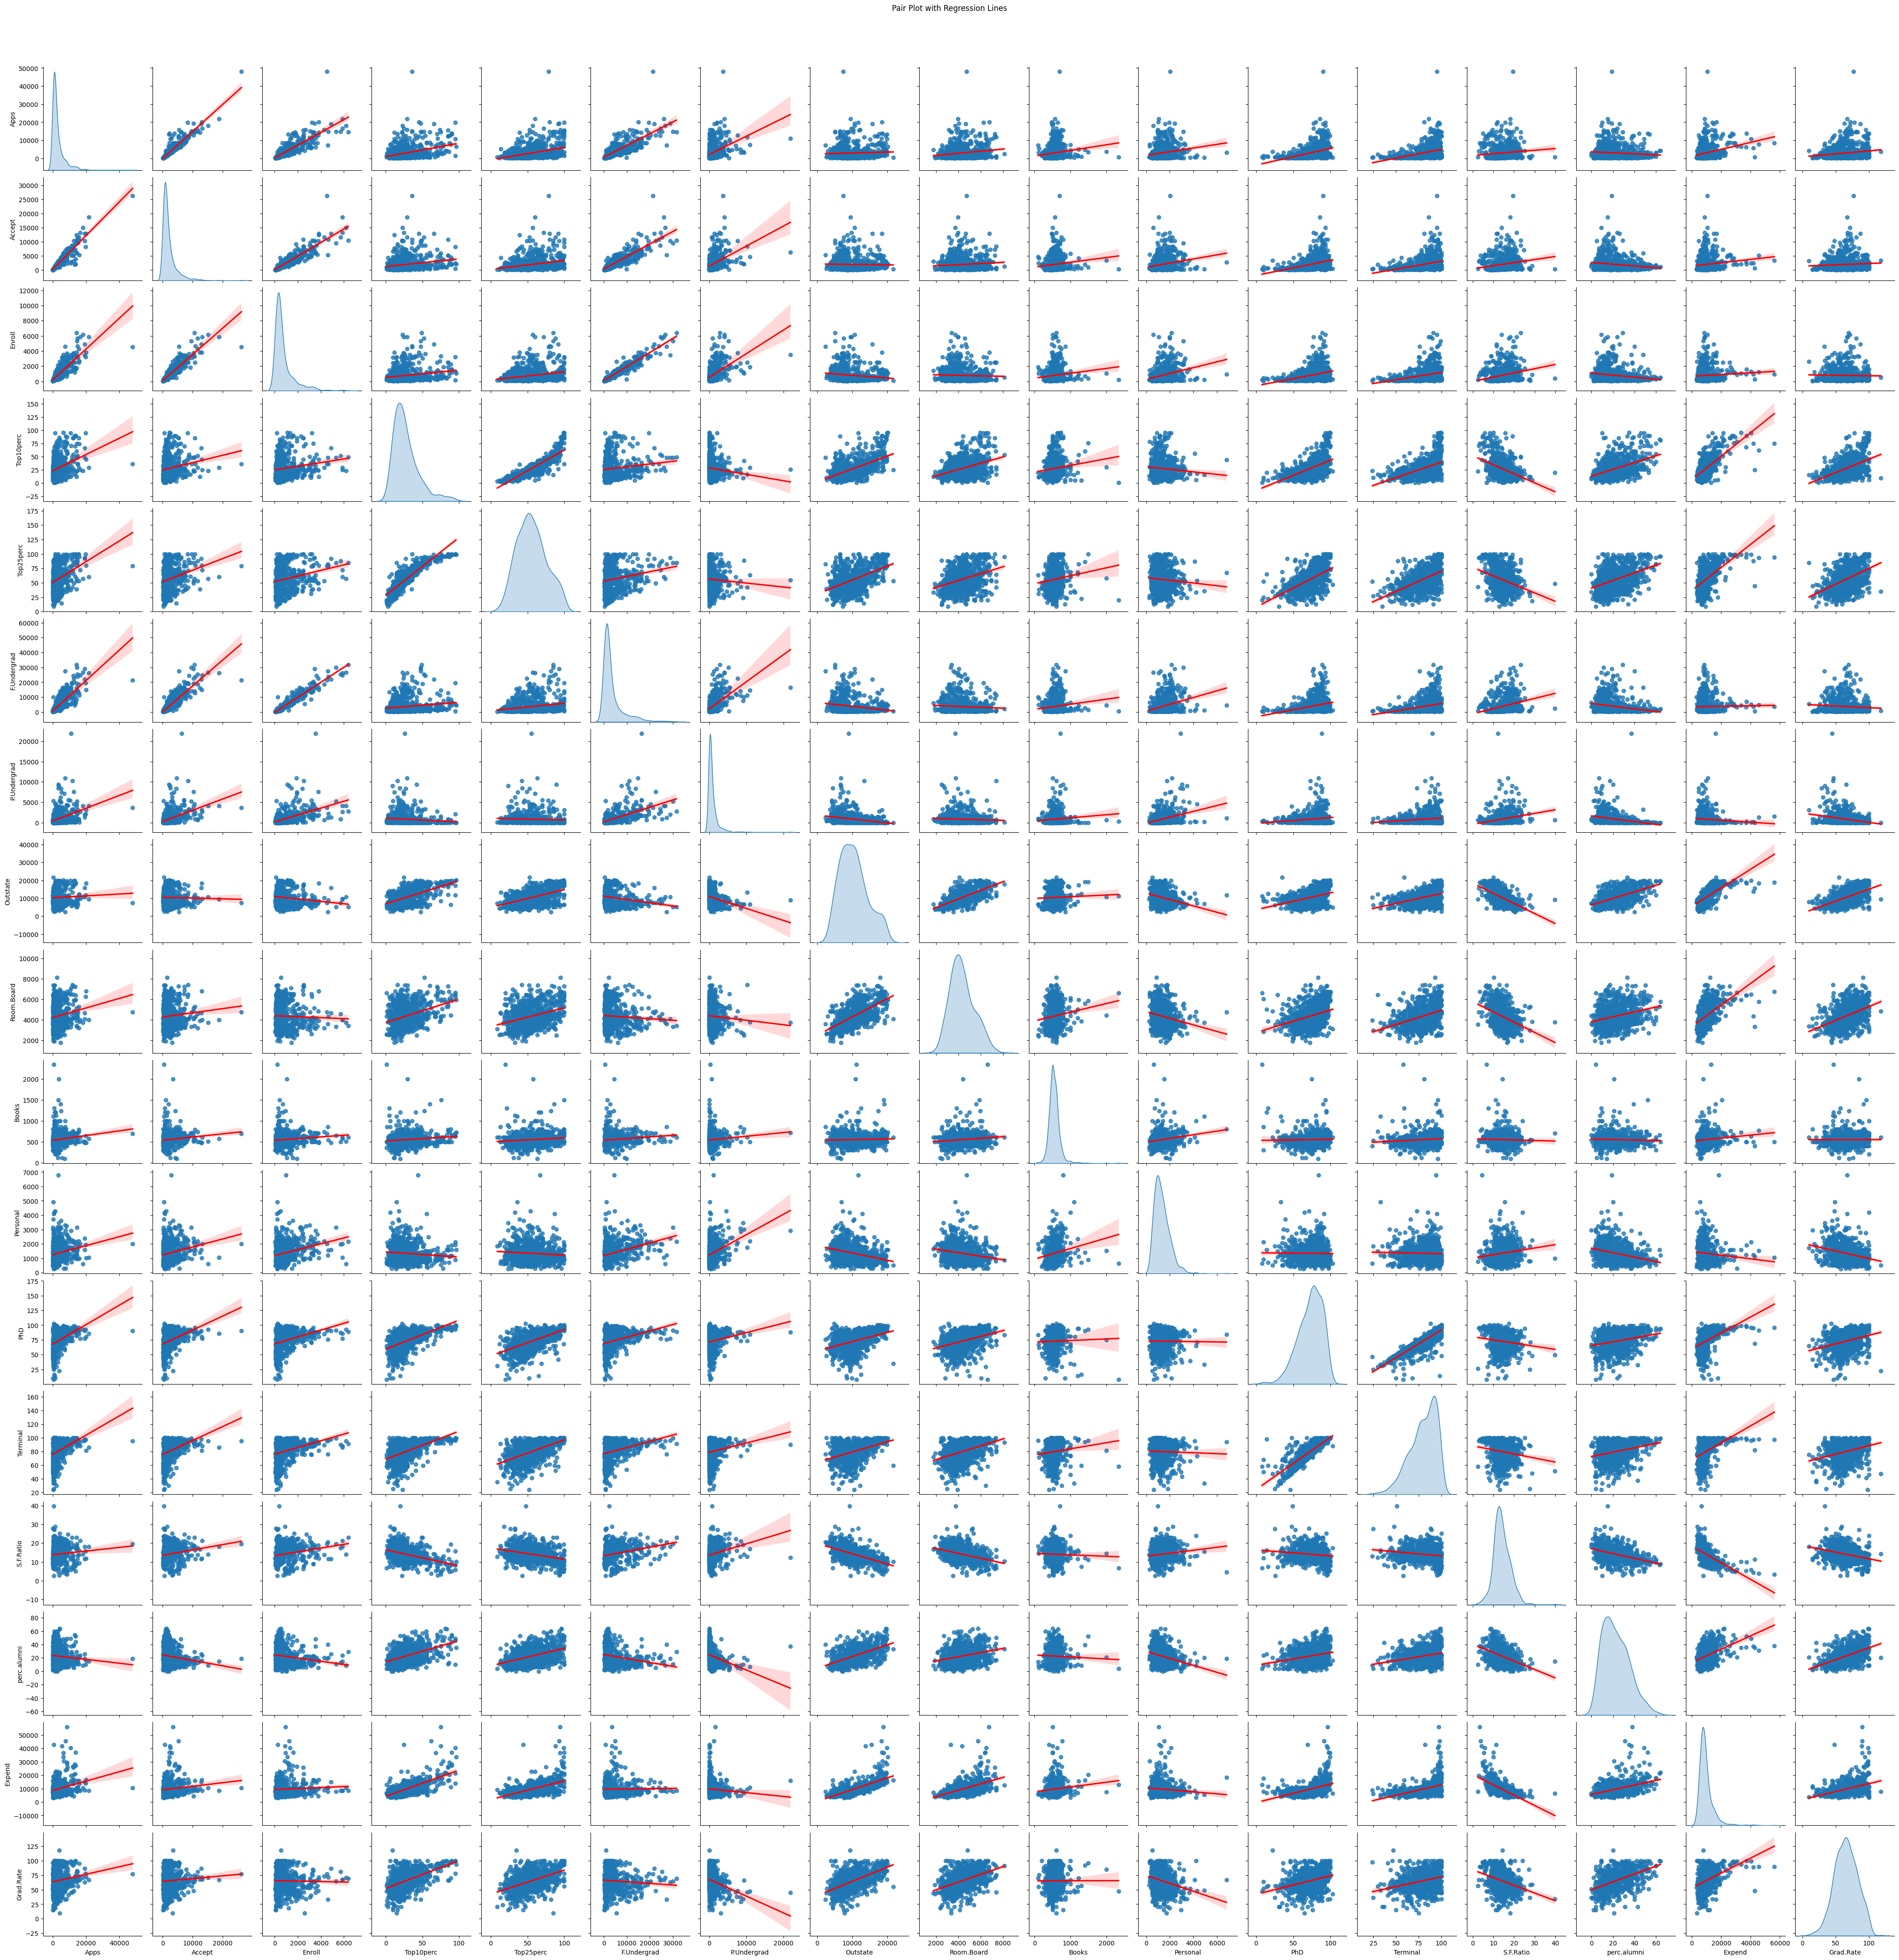

In [5]:
#Pair plot with regression lines for all data in dataframe
import seaborn as sns
sns.pairplot(df, kind="reg", diag_kind="kde", plot_kws={'line_kws':{'color':'red'}})
plt.suptitle("Pair Plot with Regression Lines", y=1.02)
plt.show()

#Correlation Matrix Heatmap for just focused catagories

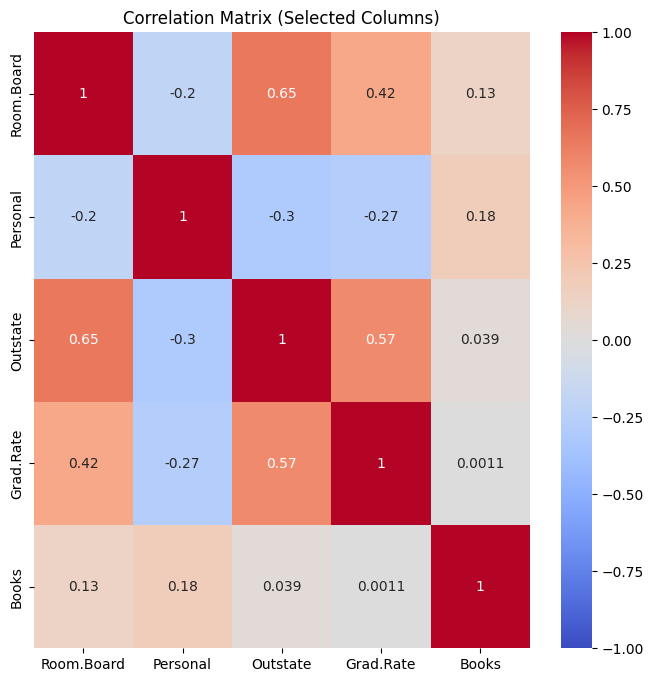

In [6]:

numeric_df = df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()

# Specify the columns and rows you want to include in the heatmap
# For example, you might want to focus on columns 'col1', 'col2', 'col3'
selected_columns = ['Room.Board', 'Personal', 'Outstate', 'Grad.Rate', 'Books']

# Subset the correlation matrix to only include the selected columns and rows
filtered_corr_matrix = corr_matrix.loc[selected_columns, selected_columns]

# Plot the heatmap
plt.figure(figsize=(8, 8))  # Adjust the size of the heatmap if needed
sns.heatmap(filtered_corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix (Selected Columns)")
plt.show()


# Splitting the Data into Public and Private

In [7]:
# Load your dataset (assuming it's a CSV file)
df = pd.read_csv('College_Data (1).csv')  # replace with your actual file path

# Filter for private and public colleges
private_colleges = df[df['Private'] == 'Yes']
public_colleges = df[df['Private'] == 'No']

# You can now focus on specific columns for affordability metrics and graduation rates
# For example, these are the columns we're interested in:
columns_of_interest = ['Private', 'Room.Board', 'Books', 'Personal', 'Grad.Rate']

private_colleges_subset = private_colleges[columns_of_interest]
public_colleges_subset = public_colleges[columns_of_interest]

# Display the first few rows of each subset for verification
print("Private Colleges Data:")
print(private_colleges_subset.head())

print("\nPublic Colleges Data:")
print(public_colleges_subset.head())

Private Colleges Data:
  Private  Room.Board  Books  Personal  Grad.Rate
0     Yes        3300    450      2200         60
1     Yes        6450    750      1500         56
2     Yes        3750    400      1165         54
3     Yes        5450    450       875         59
4     Yes        4120    800      1500         15

Public Colleges Data:
   Private  Room.Board  Books  Personal  Grad.Rate
19      No        3592    500      2000         34
21      No        2540     96      2000         70
23      No        4850    700      2100         48
25      No        2650    450      1000         48
27      No        3933    600      1908         69


#Heatmap for just public schools




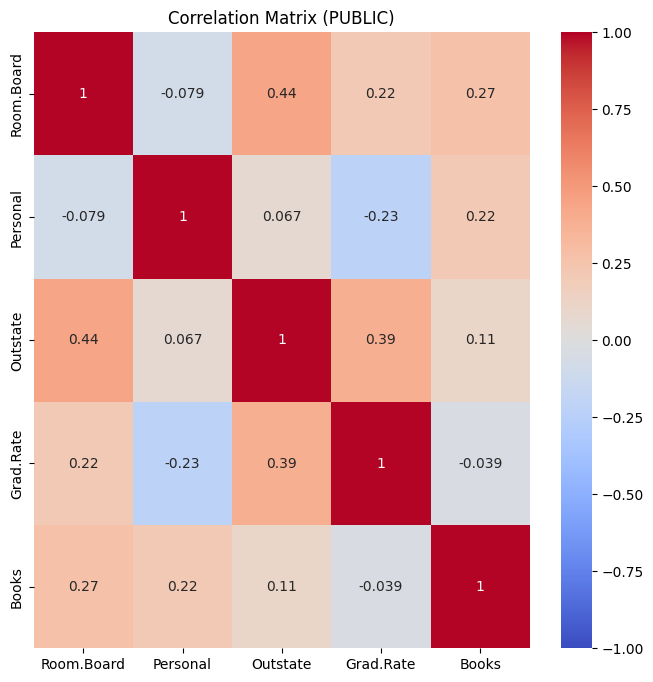

In [8]:

numeric_public = public_colleges.select_dtypes(include=['number'])

corr_matrix_public = numeric_public.corr()

# Specify the columns and rows you want to include in the heatmap
# For example, you might want to focus on columns 'col1', 'col2', 'col3'
selected_columns = ['Room.Board', 'Personal', 'Outstate', 'Grad.Rate', 'Books']

# Subset the correlation matrix to only include the selected columns and rows
filtered_corr_matrix_public = corr_matrix_public.loc[selected_columns, selected_columns]

# Plot the heatmap
plt.figure(figsize=(8, 8))  # Adjust the size of the heatmap if needed
sns.heatmap(filtered_corr_matrix_public, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix (PUBLIC)")
plt.show()

# Heatmap for just Private Schools

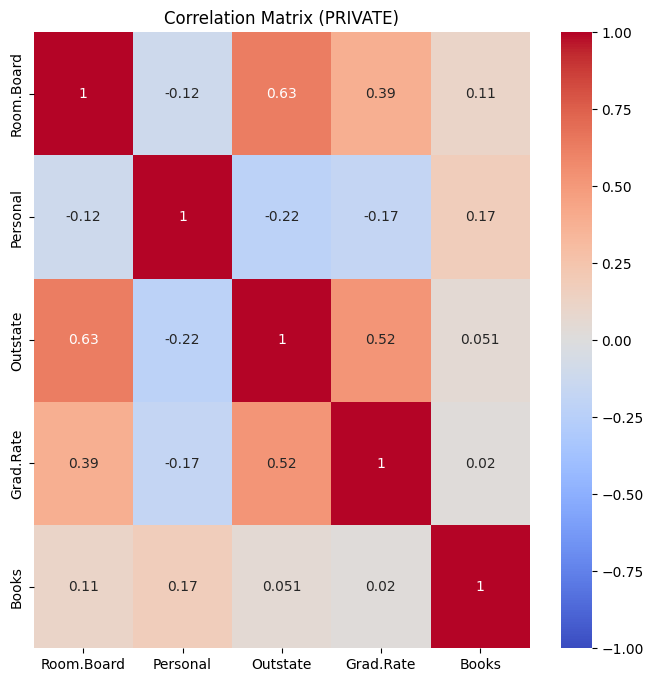

In [9]:
numeric_private = private_colleges.select_dtypes(include=['number'])

corr_matrix_private = numeric_private.corr()

# Specify the columns and rows you want to include in the heatmap
# For example, you might want to focus on columns 'col1', 'col2', 'col3'
selected_columns = ['Room.Board', 'Personal', 'Outstate', 'Grad.Rate', 'Books']

# Subset the correlation matrix to only include the selected columns and rows
filtered_corr_matrix_private = corr_matrix_private.loc[selected_columns, selected_columns]

# Plot the heatmap
plt.figure(figsize=(8, 8))  # Adjust the size of the heatmap if needed
sns.heatmap(filtered_corr_matrix_private, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix (PRIVATE)")
plt.show()

#Box Plots for Affordability Metrics in Comparision to Private vs Public


<ipython-input-10-4549fa7ff06f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  private_colleges['Type'] = 'Private'
<ipython-input-10-4549fa7ff06f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  public_colleges['Type'] = 'Public'


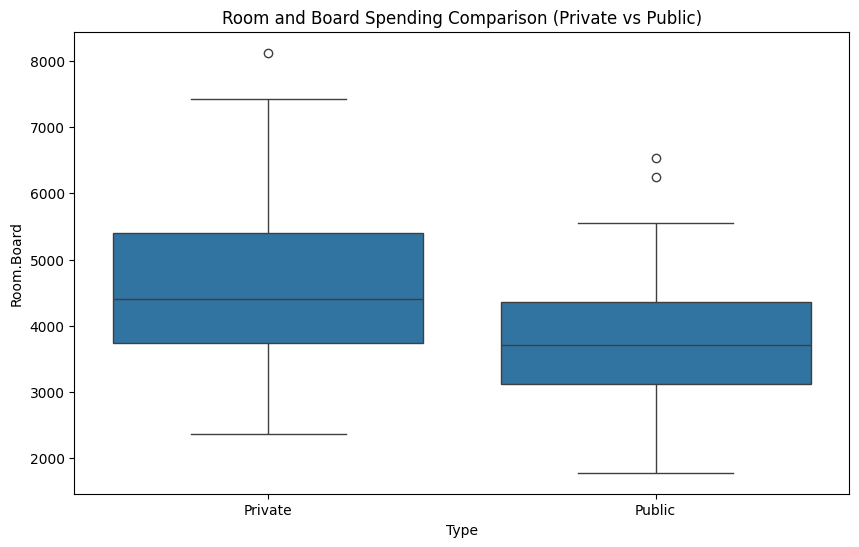

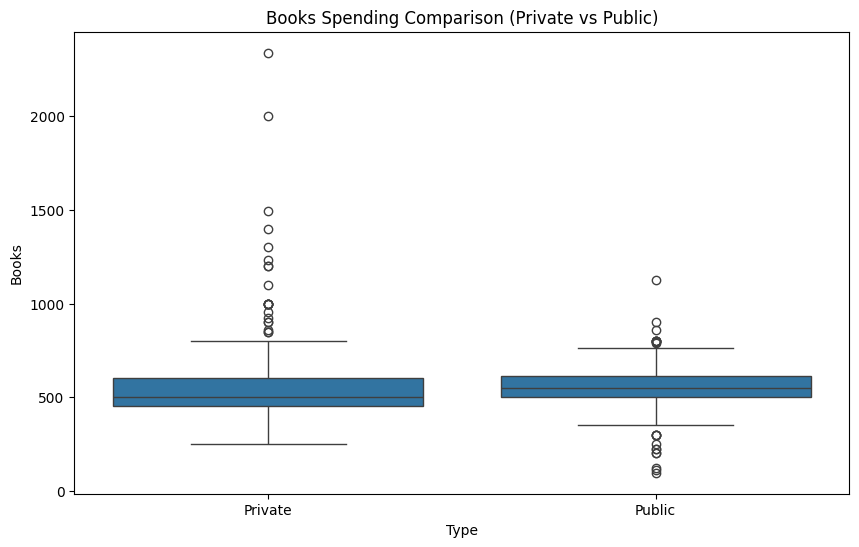

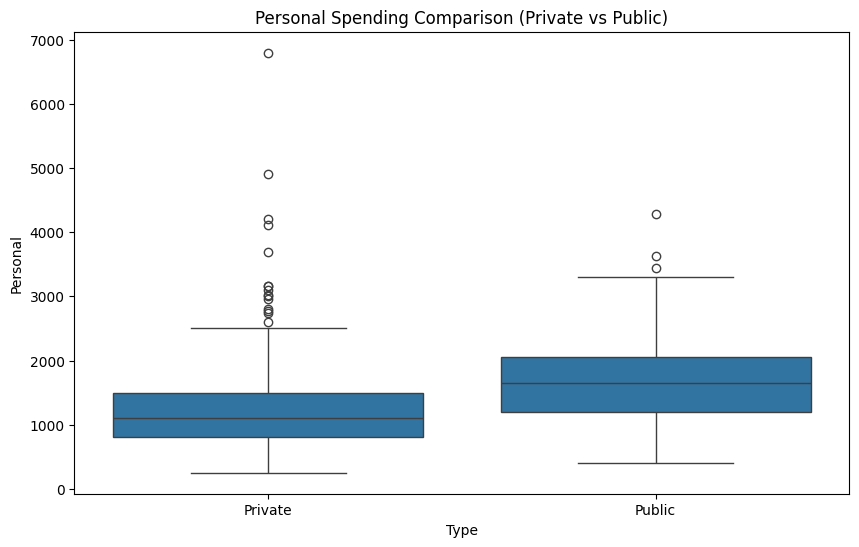

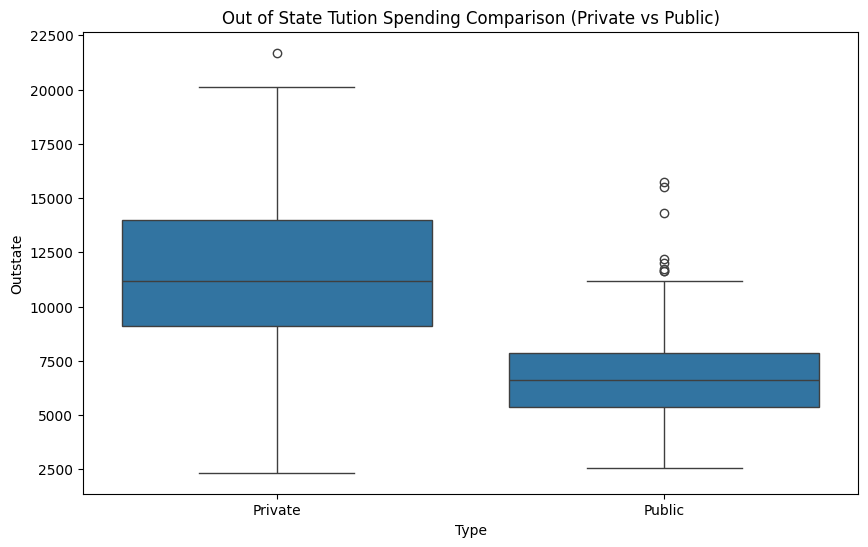

In [10]:
# Combine private and public data into a single DataFrame for easy comparison
private_colleges['Type'] = 'Private'
public_colleges['Type'] = 'Public'

# Concatenate the dataframes
comparison_df = pd.concat([private_colleges, public_colleges])

# Box plot for 'Room.Board' between private and public colleges
plt.figure(figsize=(10, 6))
sns.boxplot(data=comparison_df, x='Type', y='Room.Board')
plt.title('Room and Board Spending Comparison (Private vs Public)')
plt.show()

# Box plot for 'Books' between private and public colleges
plt.figure(figsize=(10, 6))
sns.boxplot(data=comparison_df, x='Type', y='Books')
plt.title('Books Spending Comparison (Private vs Public)')
plt.show()

# Box plot for 'Personal' spending between private and public colleges
plt.figure(figsize=(10, 6))
sns.boxplot(data=comparison_df, x='Type', y='Personal')
plt.title('Personal Spending Comparison (Private vs Public)')
plt.show()

# Box plot for 'Out of state tution' spending between private and public colleges
plt.figure(figsize=(10, 6))
sns.boxplot(data=comparison_df, x='Type', y='Outstate')
plt.title('Out of State Tution Spending Comparison (Private vs Public)')
plt.show()


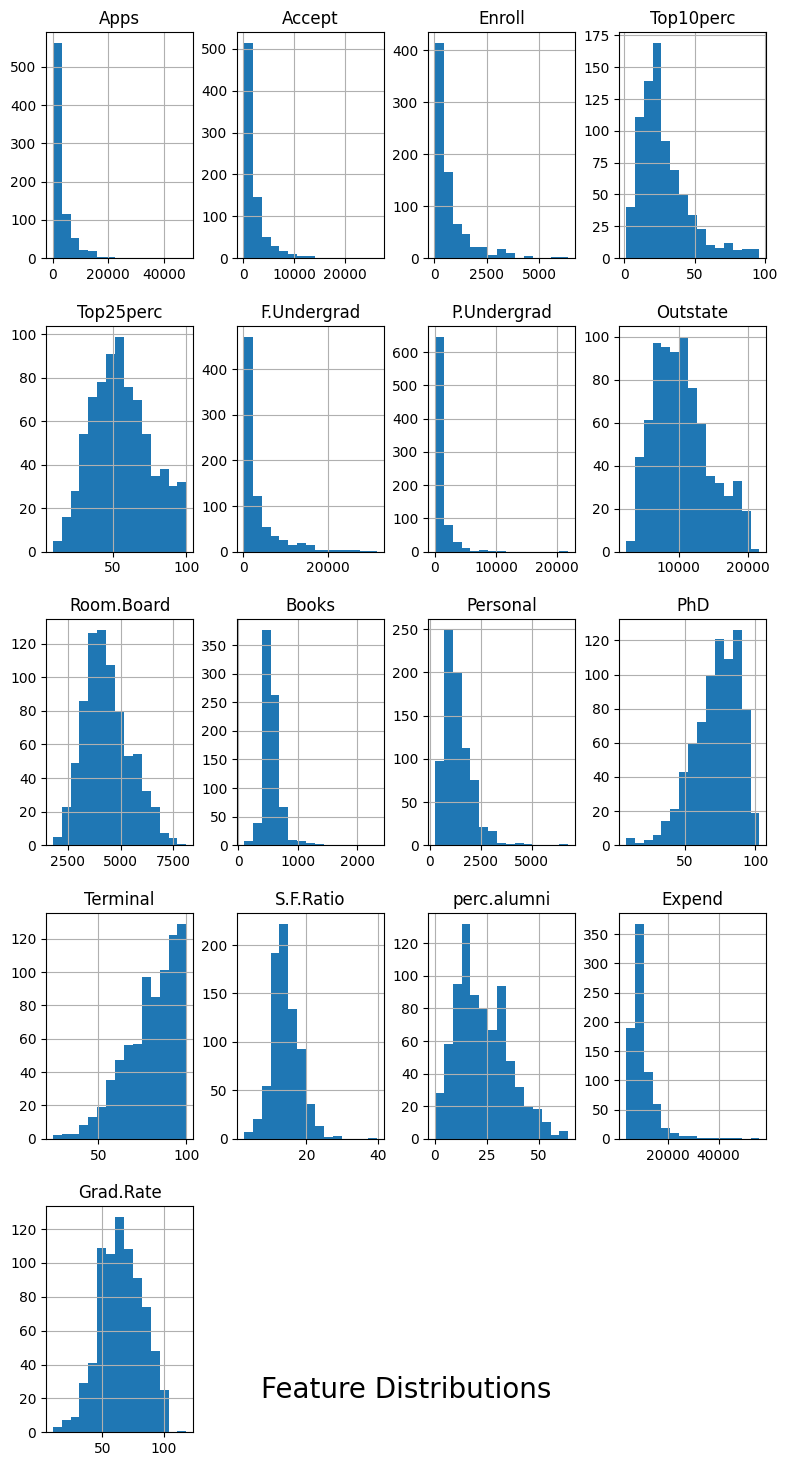

In [11]:
# Visualize feature distributions
df.hist(bins=15, figsize=(9,7))
plt.suptitle("Feature Distributions", fontsize=20)

# Adjusting margins to prevent text on top of each other (bottom of charts ran into the next charts title)
plt.subplots_adjust(left=0.1, right=0.9, top=2.9 , bottom=0.9)

plt.show()